# Flight Price Prediction

# Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing data processing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#importing ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

#importing performance evaluation libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

pd.set_option('display.max_columns',None)

In [2]:
#importing dataset as dataframe and displaying a sample
data=pd.read_excel('Flight_Fare.xlsx')
data.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10204,IndiGo,24/03/2019,Kolkata,Banglore,CCU → BLR,05:30,08:20,2h 50m,non-stop,No info,4778
4860,IndiGo,27/05/2019,Delhi,Cochin,DEL → HYD → COK,05:05,16:10,11h 5m,1 stop,No info,6600
9406,Air India,24/03/2019,Kolkata,Banglore,CCU → BBI → BLR,09:10,13:40,4h 30m,1 stop,No info,8026
3613,IndiGo,9/04/2019,Banglore,Delhi,BLR → DEL,23:30,02:20 10 Apr,2h 50m,non-stop,No info,4591
5376,Jet Airways,24/05/2019,Kolkata,Banglore,CCU → GAU → BLR,10:20,17:35,7h 15m,1 stop,No info,8781
997,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,09:00,19:00,10h,1 stop,No info,10407
3881,Vistara,1/04/2019,Kolkata,Banglore,CCU → DEL → BLR,20:20,10:45 02 Apr,14h 25m,1 stop,No info,8505
9806,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,10:55 10 May,14h 30m,1 stop,No info,10953
6525,Jet Airways,27/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,19:30,12:35 28 May,17h 5m,2 stops,No info,15129
5277,Multiple carriers,9/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info,7787


# columns in dataset

1. Airline: Column containing names of the airline
2. Date_of_journey: column containing the date of the Flight
3. Source : The name of the place where the journey starts
4. Destination: The Destination of the Flight
5. Route: The route taken by the Flight
6. Arrival_Time: The time of arrival of the Flight
7. Duration: the duration of flight in Hours and Minutes
8. Total_Stops: the total number of stops in the flight
9. Additional info: additional info about the flight booking like the food, baggage,etc.
10. Price: Price of the flight for the complete journey

# Basic Checks:

In [4]:
# Displaying shape of the dataset
data.shape

(10683, 11)

In [5]:
# Displaying a sample of dataset
data.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
7701,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,08:30,11:30,3h,non-stop,No info,7303
5856,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,11:40,10:25 02 Mar,22h 45m,1 stop,No info,25735
10157,Jet Airways,1/04/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,12:00 02 Apr,27h 35m,1 stop,In-flight meal not included,7064
2541,Jet Airways,1/06/2019,Mumbai,Hyderabad,BOM → HYD,10:20,11:50,1h 30m,non-stop,In-flight meal not included,4050
4931,Jet Airways,6/06/2019,Kolkata,Banglore,CCU → BOM → BLR,18:55,16:20 07 Jun,21h 25m,1 stop,In-flight meal not included,10844
10524,GoAir,9/03/2019,Delhi,Cochin,DEL → AMD → COK,06:00,13:20,7h 20m,1 stop,No info,8422
10620,IndiGo,6/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4174
8865,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:40,19:00,7h 20m,1 stop,No info,9794
2176,Jet Airways,9/06/2019,Kolkata,Banglore,CCU → DEL → BLR,09:35,22:05,12h 30m,1 stop,In-flight meal not included,13994
2081,Jet Airways,21/05/2019,Delhi,Cochin,DEL → COK,09:50,13:05,3h 15m,non-stop,In-flight meal not included,7202


In [6]:
#displaying the names of the columns in the dataset
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
#displaying information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
#displaying statistical information (in numerical columns) about the dataset
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
#checking for null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
#checking for duplicate values in the dataset
data.duplicated().sum()

220

# data pre-processing

It has been found that there are certain issues that need to be addressed before further processing:
1. Incorrect datatypes in the columns containing date and time
2. Null values in the dataset
3. Duplicate values in the dataset

#### fixing the datatypes of columns containing date and time and extracting new features

In [11]:
# converting 'Date of Journey' column to datetime
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], errors='coerce')
# extracting date, month and year and saving it as separate columns
data['date']=data['Date_of_Journey'].dt.day
data['month']=data['Date_of_Journey'].dt.month
data['year']=data['Date_of_Journey'].dt.year
data['day of week']=data['Date_of_Journey'].dt.dayofweek
data['weekend/weekday']=(data['day of week']>= 5).astype('int64')
#dropping the original Date of Journey column
data.drop(['Date_of_Journey'],axis=1,inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_4004\4153557309.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], errors='coerce')


In [12]:
#Converting 'Dep_Time' and 'Arrival_Time' column to datetime
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
#extracting departure and arrival hours and minutes from the 'Dep_Time' and 'Arrival_Time' column
data['Dep_Hour']=data['Dep_Time'].dt.hour
data['Dep_Min']=data['Dep_Time'].dt.minute
data['Arr_Hour']=data['Arrival_Time'].dt.hour
data['Arr_Min']=data['Arrival_Time'].dt.minute
#dropping the original 'Dep_Time' and 'Arrival_Time' column
data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_4004\745005180.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
C:\Users\msi\AppData\Local\Temp\ipykernel_4004\745005180.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])


In [13]:
data.sample(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,day of week,weekend/weekday,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,6,1,9,25,4,25
8138,Air India,Delhi,Cochin,DEL → HYD → MAA → COK,23h 40m,2 stops,No info,10975,15,6,2019,5,1,9,45,9,25
1068,IndiGo,Delhi,Cochin,DEL → COK,3h 15m,non-stop,No info,5406,21,6,2019,4,0,21,5,0,20
443,Air India,Banglore,New Delhi,BLR → HYD → DEL,4h,1 stop,No info,5013,15,3,2019,4,0,8,15,12,15
4809,Air India,Banglore,New Delhi,BLR → DEL,2h 45m,non-stop,No info,8851,15,3,2019,4,0,21,10,23,55
788,IndiGo,Chennai,Kolkata,MAA → CCU,2h 20m,non-stop,No info,3597,15,5,2019,2,0,14,45,17,5
8468,Jet Airways,Delhi,Cochin,DEL → BOM → COK,26h 15m,1 stop,No info,17024,6,3,2019,2,0,17,30,19,45
4343,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,In-flight meal not included,6478,3,6,2019,0,0,17,45,20,45
7493,IndiGo,Banglore,New Delhi,BLR → DEL,3h,non-stop,No info,6860,15,3,2019,4,0,8,30,11,30
1167,Jet Airways,Banglore,Delhi,BLR → DEL,2h 45m,non-stop,No info,7229,18,4,2019,3,0,6,0,8,45


In [14]:
# Extracting hours and minutes from 'Duration' column
duration=list(data["Duration"])
for i in range(len(duration)):
  if len(duration[i].split())!=2:
    if "h" in duration[i]:
      duration[i]=duration[i].strip()+" 0m"
    else:
      duration[i]="0h "+duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep="h")[0]))
  duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))
# saving the extracted duration hour and minutes from the dataset into new columns
data['Dur_Hour']=duration_hours
data['Dur_Min']=duration_mins
#dropping the original 'Duration' column
data.drop(['Duration'],axis=1,inplace=True)

In [15]:
data.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,day of week,weekend/weekday,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hour,Dur_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,6,1,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,2,0,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,6,1,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,6,1,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,4,0,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,2019,0,0,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,2019,1,0,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,1,3,2019,4,0,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,2019,1,0,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,2019,0,0,11,25,19,15,7,50


In [16]:
# checking datatypes again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   date             10683 non-null  int32 
 8   month            10683 non-null  int32 
 9   year             10683 non-null  int32 
 10  day of week      10683 non-null  int32 
 11  weekend/weekday  10683 non-null  int64 
 12  Dep_Hour         10683 non-null  int32 
 13  Dep_Min          10683 non-null  int32 
 14  Arr_Hour         10683 non-null  int32 
 15  Arr_Min          10683 non-null  int32 
 16  Dur_Hour         10683 non-null  int64 
 17  Dur_Min          10683 non-null

#### handling null values

In [17]:
#as there are only two null values, we can drop them without affecting model perofromance
data.dropna(inplace=True)

In [18]:
#checking for null data again
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
date               0
month              0
year               0
day of week        0
weekend/weekday    0
Dep_Hour           0
Dep_Min            0
Arr_Hour           0
Arr_Min            0
Dur_Hour           0
Dur_Min            0
dtype: int64

#### handling duplicate values

In [19]:
#extracting the duplicate data
dup_data=data[data.duplicated()]
dup_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,day of week,weekend/weekday,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hour,Dur_Min
683,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,2 stops,No info,13376,1,6,2019,5,1,14,35,4,25,13,50
1061,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info,10231,21,5,2019,1,0,22,0,19,15,21,15
1348,Air India,Delhi,Cochin,DEL → HYD → BOM → COK,2 stops,No info,12392,18,5,2019,5,1,17,15,19,15,26,0
1418,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,2 stops,In-flight meal not included,10368,6,6,2019,3,0,5,30,4,25,22,55
1674,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,7303,24,3,2019,6,1,18,25,21,20,2,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,12819,27,6,2019,3,0,23,5,12,35,13,30
10616,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,2 stops,No info,13014,1,6,2019,5,1,9,40,12,35,26,55
10634,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,2 stops,In-flight meal not included,11733,6,6,2019,3,0,9,40,12,35,26,55
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,In-flight meal not included,11150,27,6,2019,3,0,23,5,19,0,19,55


In [20]:
#dropping duplicates
data.drop_duplicates(inplace=True)

#### Handling outliers

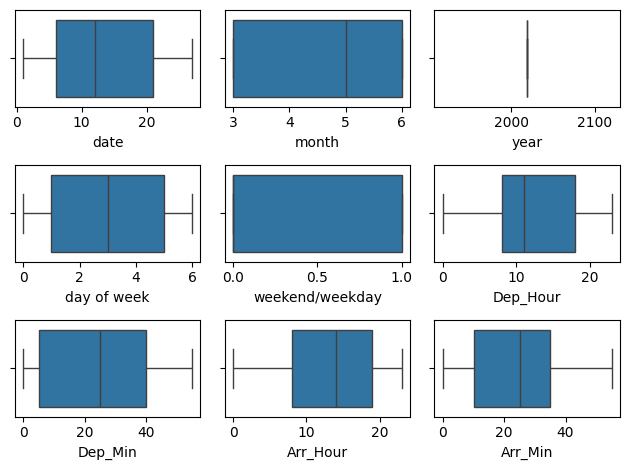

In [21]:
#saving the list of numerical columns
num_col=data.select_dtypes(include=['int']).columns
#plotting outliers excluding the target column
plt.Figure(figsize=(30,30))
pltn=1
for i in num_col.drop('Price'):
    if pltn<=9:
        ax=plt.subplot(3,3,pltn)
        sns.boxplot(x=data[i])
        plt.xlabel(i)
    pltn+=1
plt.tight_layout() 

we can see that the column 'Dur_Hour' has outliers

<Axes: xlabel='Dur_Hour', ylabel='Count'>

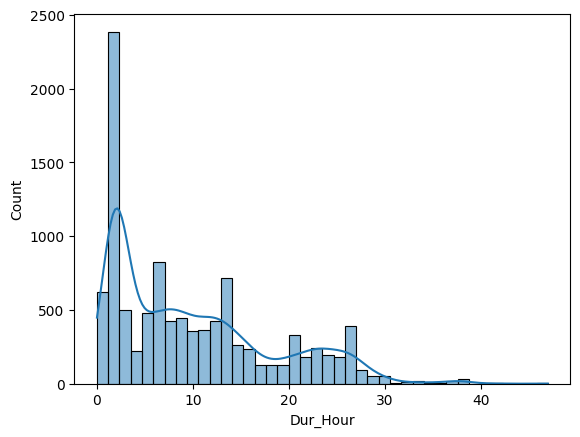

In [22]:
#plotting the distribution of 'Dur_Hour'
sns.histplot(data=data,x='Dur_Hour',kde=True)

The distribution is not normal, thus we will use the IQR method to handle outliers

In [23]:
q1=data['Dur_Hour'].quantile(0.25)
print('Lower Quartile(Q1):',q1)
q3=data['Dur_Hour'].quantile(0.75)
print('Upper Quarti\le(Q3):',q3)
iqr=q3-q1
print('IQR:',iqr)
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr
print('lower limit:',l_lim)
print('upper limit:',u_lim)
o_p=len((data.loc[data['Dur_Hour']>u_lim])*100)/len(data)
print('percentage of outliers:',o_p)

Lower Quartile(Q1): 2.0
Upper Quarti\le(Q3): 15.0
IQR: 13.0
lower limit: -17.5
upper limit: 34.5
percentage of outliers: 0.006405353728489484


In [24]:
#replacing outliers with median
data.loc[data['Dur_Hour']>u_lim,'Dur_Hour']=data['Dur_Hour'].median()
data.loc[data['Dur_Hour']<l_lim,'Dur_Hour']=data['Dur_Hour'].median()

<Axes: xlabel='Dur_Hour'>

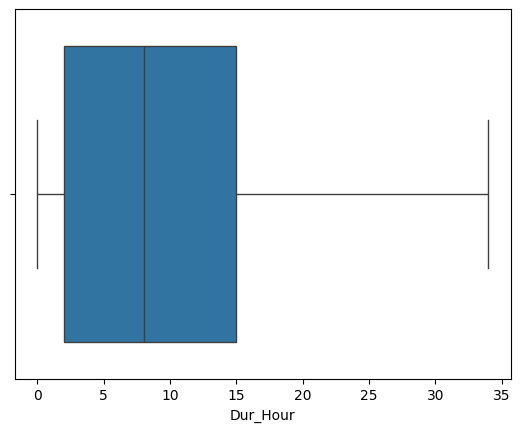

In [25]:
#checking for outliers for verification
sns.boxplot(x=data['Dur_Hour'])

# EDA

#### Univariate Analysis

In [26]:
plt.figure(figsize=(100,100))
for i,j in enumerate(data.columns):
    plt.subplot(6,3,i+1)
    
    if data[j].dtype=='O':
        sns.countplot(x=j,data=data)
    else:
        sns.histplot(data[j],kde=True)
        plt.title(f'distribution of {j}')
plt.tight_layout()
    


#### insights:

we can see that:
1. 'Jet Airways' is the most common airline, followed by 'IndiGo' and then 'Air India'
2. Most of the flights originate from 'Delhi', and then followed by 'Kolkata' and then 'Bangalore'
3. 'Cochin' is the most destination city, followed by 'Bangalore' and then 'New Delhi'
4. 'DEL → BOM → COK' is the most common route, followed by 'BLR → DEL' and then 'CCU → BOM → BLR'
5. Most of the flights have one stop
6. 'Additional_Info' column does not contain any significant information
7. A huge majority of flight fares are under Rs. 20000
8. A huge number of the flights take off before Mid day
9. A huge number of flights arrive after midday
10. Most of the flight durations are around 2 hours, followed by 6 hours and then 13 hours

#### Bivariate Analysis

<Axes: xlabel='Airline', ylabel='Price'>

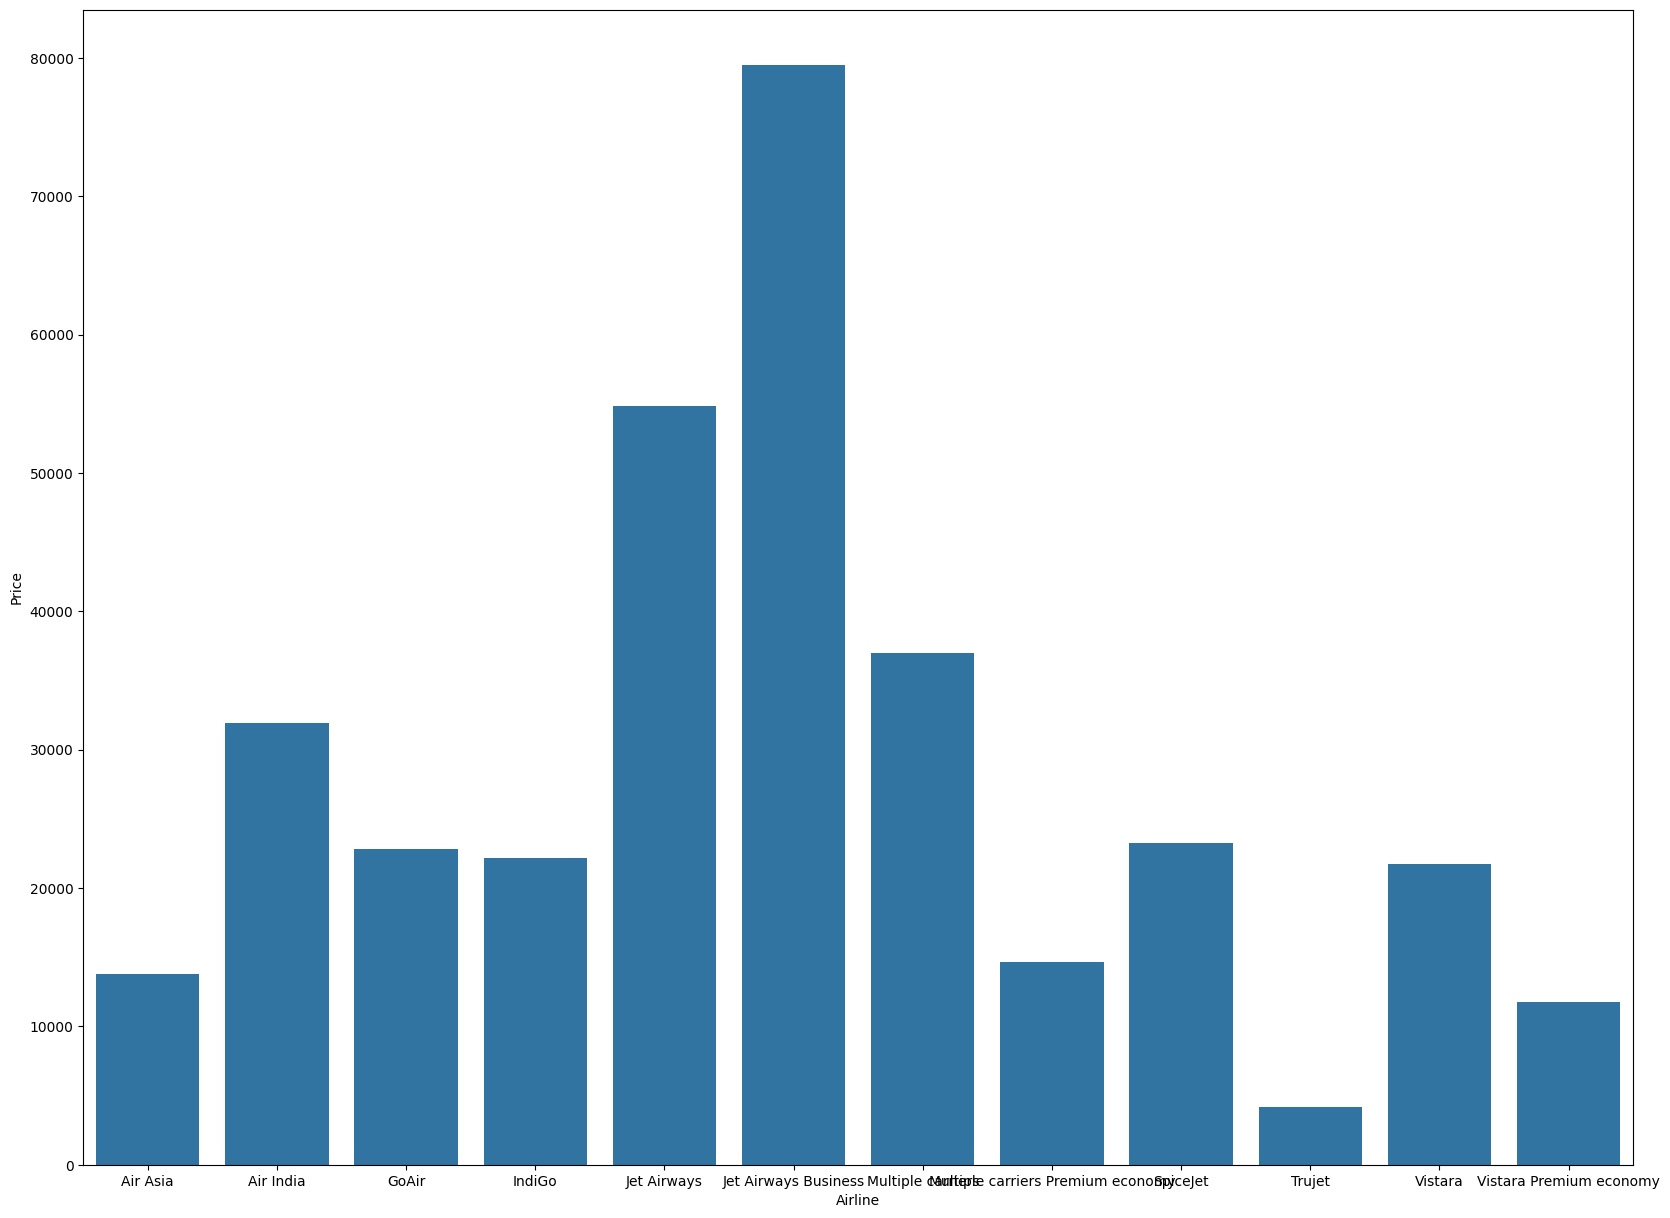

In [27]:
# relation between Airline and Maximum flight fare
plt.figure(figsize=(20,15))
sns.barplot(data.groupby('Airline').Price.max())

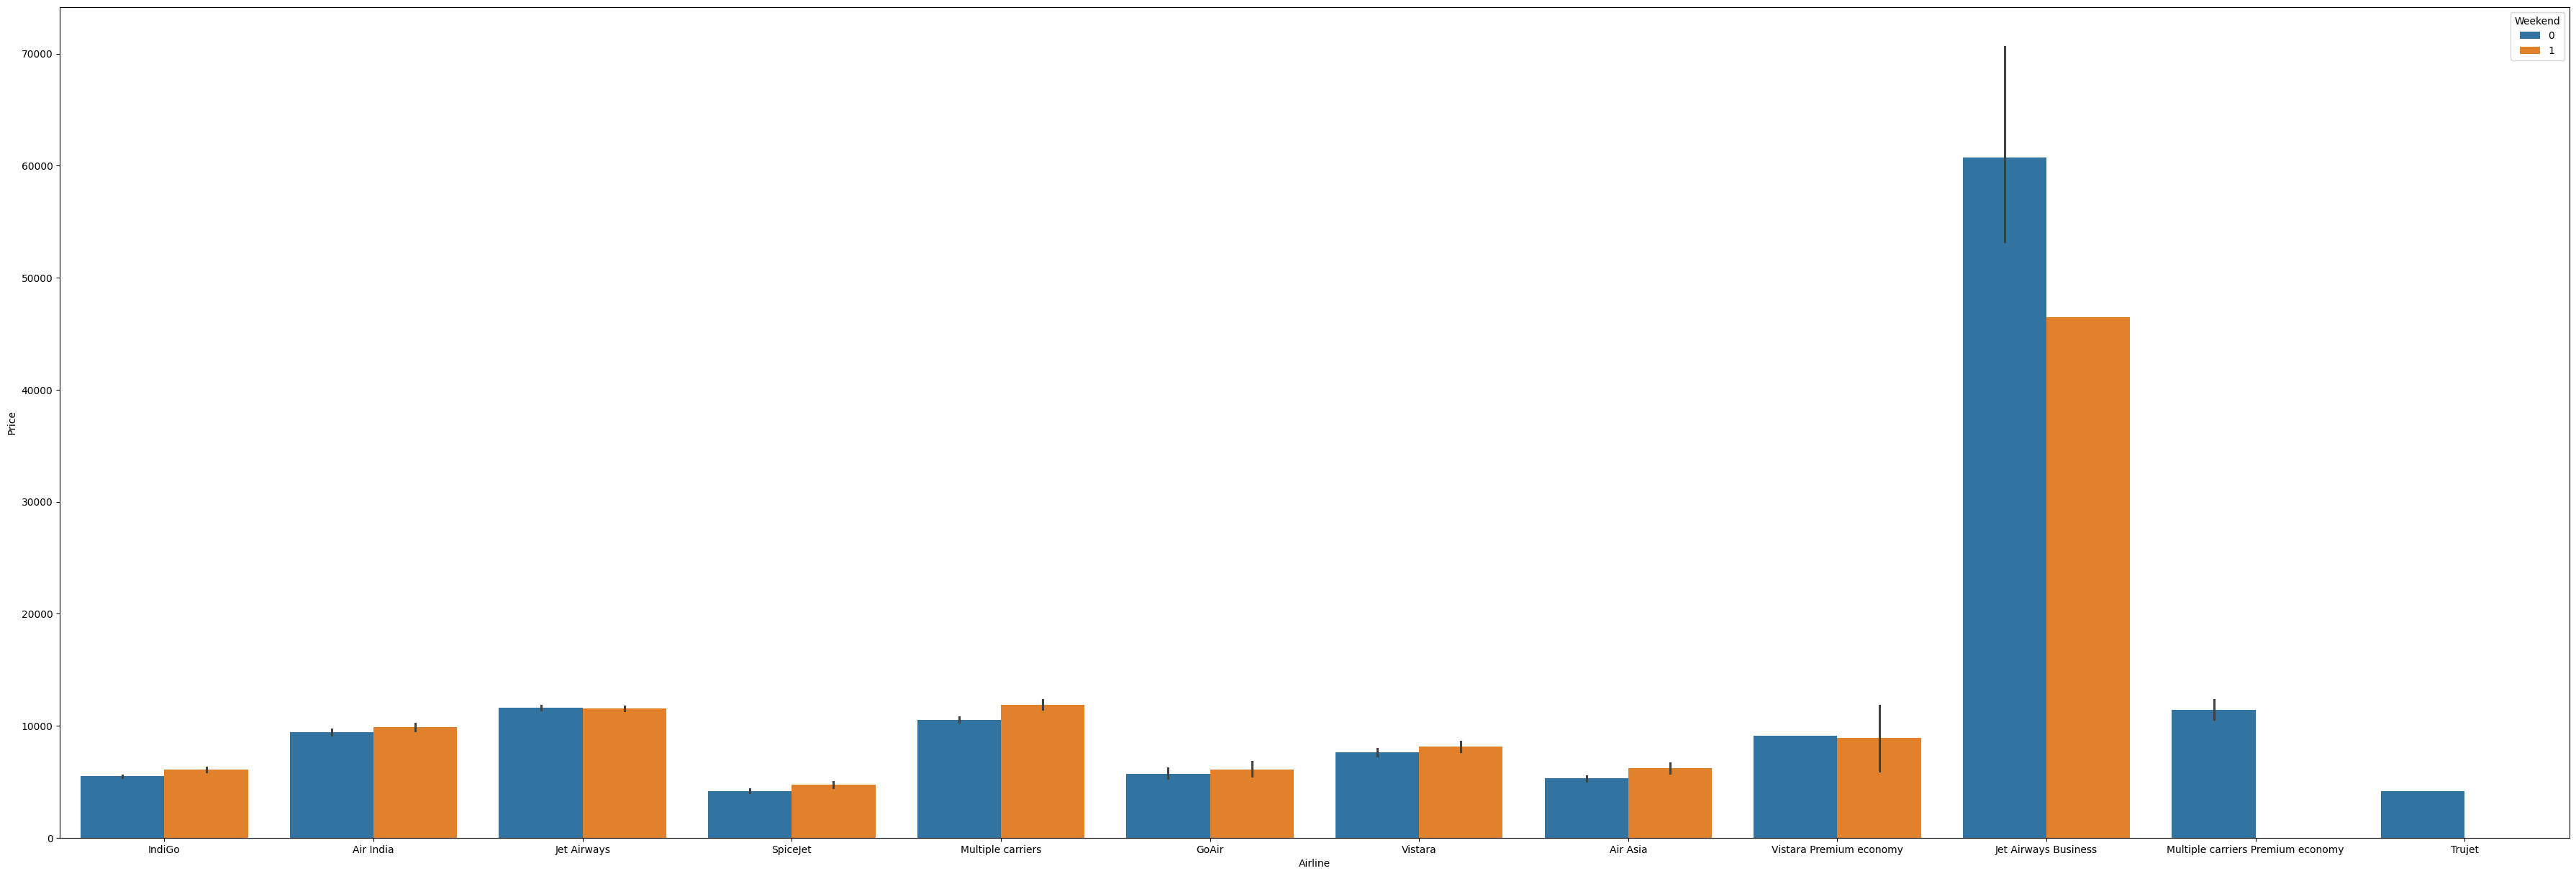

In [28]:
#comparing maximum fares for each airline on weekend/weekday
max_prices = data.groupby(['Airline', 'weekend/weekday'])['Price'].max().reset_index()
plt.figure(figsize=(45,15))
sns.barplot(data=data,x='Airline',y='Price',hue='weekend/weekday')
plt.legend(title='Weekend')

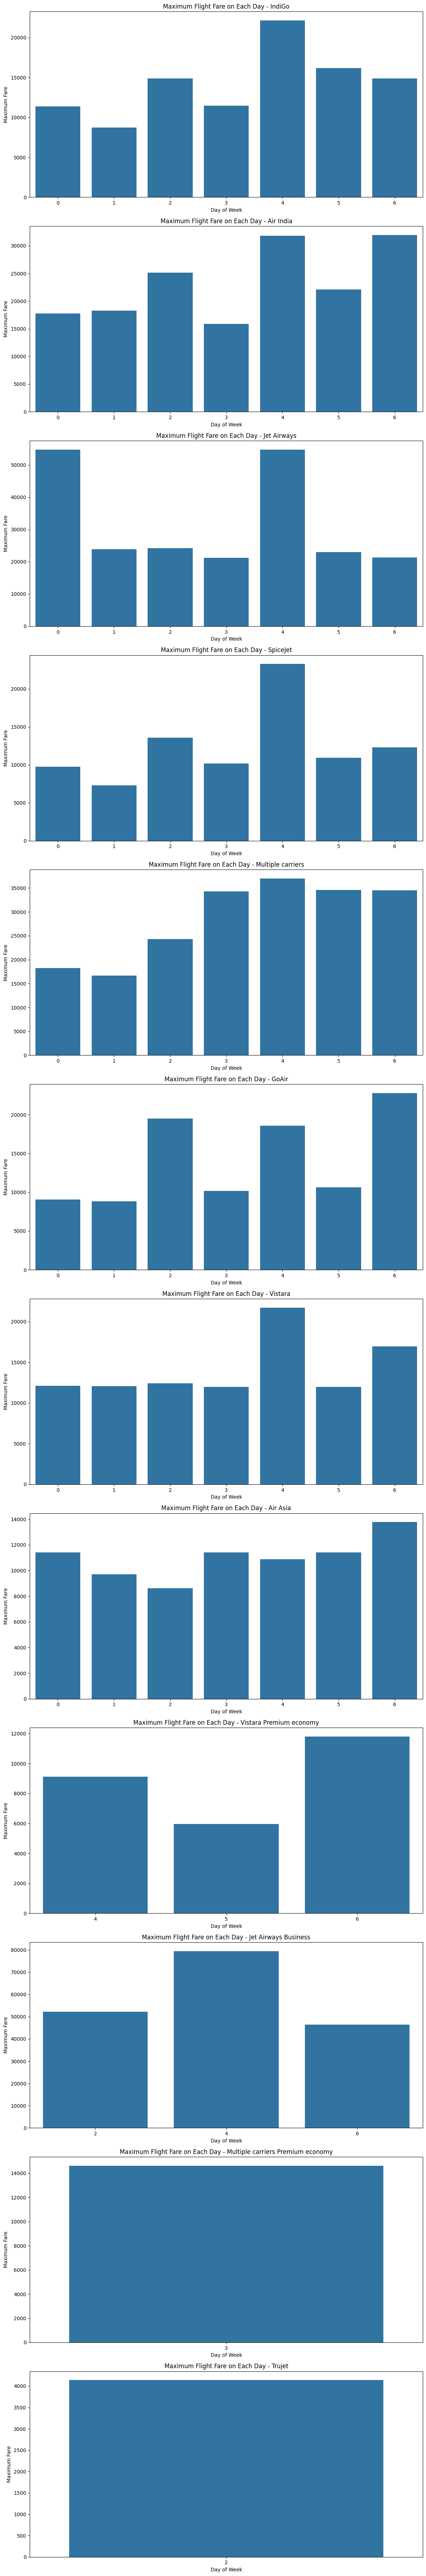

In [29]:
# visualising max priceqs for each day of the week for each airline

airlines = data['Airline'].unique()

max_prices_day = data.groupby(['Airline', 'day of week'])['Price'].max().reset_index()

fig, axes = plt.subplots(nrows=len(airlines), figsize=(12, 6 * len(airlines)))

for idx, airline in enumerate(airlines):
    airline_data = max_prices_day[max_prices_day['Airline'] == airline]
    sns.barplot(x='day of week', y='Price', data=airline_data, ax=axes[idx])
    axes[idx].set_title(f'Maximum Flight Fare on Each Day - {airline}')
    axes[idx].set_xlabel('Day of Week')
    axes[idx].set_ylabel('Maximum Fare')

plt.tight_layout()
plt.show()

#### Insights

we can see that:
1. Flight fare on weekends is higher than weekdays for most of the airlines
2. Highest airfare is seen on Friday for most airlines

#### correlation betwee columns

In [58]:
corr_mat= data.corr(numeric_only=True)
corr_mat.style.background_gradient()

,Price,date,month,day of week,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hour,Dur_Min
Price,1.000000,-0.158995,-0.113605,0.056049,0.005373,-0.024177,0.030821,-0.086295,0.505239,-0.131553
date,-0.158995,1.000000,-0.038343,-0.085870,-0.003438,-0.004836,-0.002483,-0.015125,-0.029366,-0.009178
month,-0.113605,-0.038343,1.000000,-0.081484,0.040890,-0.062753,0.000918,-0.099582,0.026063,-0.045981
day of week,0.056049,-0.085870,-0.081484,1.000000,-0.014321,0.013844,-0.006298,0.029972,-0.013977,0.033233
Dep_Hour,0.005373,-0.003438,0.040890,-0.014321,1.000000,-0.014969,-0.003259,0.073342,0.024683,-0.019252
Dep_Min,-0.024177,-0.004836,-0.062753,0.013844,-0.014969,1.000000,0.046442,-0.021440,-0.019486,0.089400
Arr_Hour,0.030821,-0.002483,0.000918,-0.006298,-0.003259,0.046442,1.000000,-0.152463,0.050271,-0.116289
Arr_Min,-0.086295,-0.015125,-0.099582,0.029972,0.073342,-0.021440,-0.152463,1.000000,-0.078301,0.156484
Dur_Hour,0.505239,-0.029366,0.026063,-0.013977,0.024683,-0.019486,0.050271,-0.078301,1.000000,-0.121768
Dur_Min,-0.131553,-0.009178,-0.045981,0.033233,-0.019252,0.089400,-0.116289,0.156484,-0.121768,1.000000


#### Insight

we can see that there are no significant correlations between columns, thus no processing is required

#### Further processing

it has been observed that:
1. Year column only contains one value (2019)
2. Additional_Info column does not contain any significant information
3. Route column is insignificant as all the relevant information is captured in the the Source, Destination and Total_Stops column.
4. The weekend/weekday column is also not significant as the the information is also coontained in the day of week column created
      

In [31]:
# Dropping all irrelavant columns
d_col=['Route','Additional_Info','year','weekend/weekday']
data.drop(columns=d_col,inplace=True)

In [32]:
data.sample(5)

,Airline,Source,Destination,Total_Stops,Price,date,month,day of week,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hour,Dur_Min
9380,Jet Airways,Banglore,Delhi,non-stop,8016,18,6,1,7,10,10,10,3,0
5840,Air India,Delhi,Cochin,1 stop,8372,18,5,5,21,0,7,40,10,40
2853,Air India,Kolkata,Banglore,2 stops,10676,18,5,5,12,0,11,10,23,10
3610,Multiple carriers,Delhi,Cochin,1 stop,13961,21,3,3,2,15,13,20,11,5
7541,Jet Airways,Kolkata,Banglore,1 stop,10844,6,6,3,8,25,16,20,7,55


# Feature Engineering

#### Feature scaling

we can use both standard scaler and MinMax scaler for our purposes, and compare final results for each method, and choose the best one out of those.

* Standard Scaler: Standard Scaling transforms the data to have a mean of 0 and a standard deviation of 1. It is suitable when the features in your dataset have different units or follow different distributions.

* MinMax Scaler: Min-Max Scaling transforms the data to a specific range, typically [0, 1]. It is useful when you have features with different scales and want to ensure that all features contribute equally to the model.


In [33]:
# saving columns containing continious numerical values as a list
num_col=['Dep_Hour','Dep_Min','Arr_Hour','Arr_Min','Dur_Hour','Dur_Min']

##### Standard Scaler

In [34]:
#initialising the standard scaler object
ss=StandardScaler()

#copying original dataframe
ss_data=data.copy()

#applying the Standard Scaler object to the required columns

ss_data[num_col]=ss.fit_transform(ss_data[num_col])

In [35]:
#verifying data scaling
ss_data.sample(5)

,Airline,Source,Destination,Total_Stops,Price,date,month,day of week,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hour,Dur_Min
9264,IndiGo,Banglore,Delhi,non-stop,4823,3,6,0,0.964610,0.031552,1.110338,-0.285056,-0.970432,1.587588
4314,Air India,Delhi,Cochin,1 stop,8907,12,6,2,1.313895,0.297282,1.402150,-1.492093,2.001379,0.106296
187,Jet Airways,Kolkata,Banglore,1 stop,10539,6,6,3,-0.607176,0.563012,-0.640536,1.223741,1.753728,-1.078737
2200,Jet Airways,Mumbai,Hyderabad,non-stop,4995,24,5,4,-0.956462,-1.031368,-0.786443,0.318463,-1.094257,-0.189962
752,IndiGo,Delhi,Cochin,1 stop,5054,27,5,0,0.615324,-1.297098,1.110338,-1.492093,-0.598955,-1.671254


##### MinMax Scaler

In [36]:
#initialising the MinMax scaler object
mm=MinMaxScaler()

#copying original dataframe
mm_data=data.copy()

#applying the MinMax Scaler object to the required columns

mm_data[num_col]=mm.fit_transform(mm_data[num_col])

In [37]:
#verifying data scaling
mm_data.sample(5)

,Airline,Source,Destination,Total_Stops,Price,date,month,day of week,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hour,Dur_Min
8352,Air India,Delhi,Cochin,1 stop,10671,15,5,2,0.565217,0.545455,0.347826,0.272727,0.529412,0.818182
4631,IndiGo,Delhi,Cochin,1 stop,13611,9,3,5,0.695652,0.000000,0.043478,0.636364,0.264706,0.636364
2821,Jet Airways,Kolkata,Banglore,1 stop,13941,12,5,6,0.869565,0.000000,0.347826,0.272727,0.352941,0.272727
9358,Jet Airways,Kolkata,Banglore,1 stop,10844,9,6,6,0.260870,0.545455,0.782609,0.272727,0.323529,0.818182
9559,Jet Airways,Delhi,Cochin,1 stop,14714,15,6,5,0.608696,0.000000,0.826087,0.000000,0.147059,0.000000


#### Feature encoding

In [38]:
mm_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'date',
       'month', 'day of week', 'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min',
       'Dur_Hour', 'Dur_Min'],
      dtype='object')

In [39]:
# saving all cateorical columns in a  list
cat_col=['Airline', 'Source', 'Destination', 'Total_Stops','month', 'day of week']

#printing unique values in each categorical column:

for i in cat_col:
    print('Column Name:',i)
    print(data[i].value_counts())
    print('-------------------')

Column Name: Airline
Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
-------------------
Column Name: Source
Source
Delhi       4345
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: count, dtype: int64
-------------------
Column Name: Destination
Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     912
Hyderabad     697
Kolkata       381
Name: count, dtype: int64
-------------------
Column Name: Total_Stops
Total_Stops
1 stop      5625
non-stop    3473
2

we can see that:
* We can use one hot encoding for 'Source','Destination','Total Stops' and 'month' columns as the number of unique values is not too high.

* Label encoding or Frequency encoding can be used for 'Airline' and 'day of week' column, as one hot encoding would increase dimensionality and complexity due to the high number of unique values in these columns.

#### encoding standard scaled data using label encoder and one hot encoder

In [40]:
#initialising the Label Encoder object
le=LabelEncoder()

#copying the standard scaled data
le_ss_data=ss_data.copy()

#saving columns for one hot encoding as a list

oh_col=['Source', 'Destination', 'Total_Stops', 'month']

# Label encoding for 'Airline'
le_ss_data['Airline'] = le.fit_transform(le_ss_data['Airline'])

# Label encoding for 'day of week'
le_ss_data['day of week'] = le.fit_transform(le_ss_data['day of week'])

# One-Hot Encoding other columns
le_ss_data = pd.get_dummies(le_ss_data, columns=oh_col, drop_first=True)

#converting datatype of the dataframe to integer (to convert new one hot encoded columns containing boolean values)
le_ss_data=le_ss_data.astype(int)

In [41]:
#verifying data after encoding
le_ss_data.sample(5)

,Airline,Price,date,day of week,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hour,Dur_Min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,month_4,month_5,month_6
5454,8,3543,27,3,0,1,0,-1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
7357,8,6300,12,1,0,1,0,-1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2868,8,3919,3,2,1,0,-1,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
2498,10,5403,9,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
5867,1,11948,12,1,0,-1,1,0,0,-1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


#### encoding MinMax scaled data using label encoder and one hot encoder

In [42]:
#initialising the Label Encoder object
le=LabelEncoder()

#copying the MinMax scaled data
le_mm_data=mm_data.copy()

#saving columns for one hot encoding as a list

oh_col=['Source', 'Destination', 'Total_Stops', 'month']

# Label encoding for 'Airline'
le_mm_data['Airline'] = le.fit_transform(le_mm_data['Airline'])

# Label encoding for 'day of week'
le_mm_data['day of week'] = le.fit_transform(le_mm_data['day of week'])

# One-Hot Encoding other columns
le_mm_data = pd.get_dummies(le_mm_data, columns=oh_col, drop_first=True)

#converting datatype of the dataframe to integer (to convert new one hot encoded columns containing boolean values)
le_mm_data=le_mm_data.astype(int)

In [43]:
#veryfing data after encoding
le_mm_data.sample(5)

,Airline,Price,date,day of week,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hour,Dur_Min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,month_4,month_5,month_6
10153,4,16289,21,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6548,4,16079,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4098,3,4049,6,3,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1994,3,4049,18,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
2247,8,5409,6,3,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


#### encoding Standard scaled data using frequency encoder and one hot encoder

In [44]:
# Copying the standard scaled data
fe_ss_data = ss_data.copy()

# saving Columns for frequency encoding as a list
fe_col = ['Airline', 'day of week']

#saving columns for one hot encoding as a list
oh_col=['Source', 'Destination', 'Total_Stops', 'month']

# Create a dictionary to store frequencies
frequency_dict = {}
for i in fe_col:
    frequency_dict[i] = fe_ss_data[i].value_counts().to_dict()

# Replace categorical values with frequencies
for i in fe_col:
    fe_ss_data[i] = fe_ss_data[i].map(frequency_dict[i])

# One-Hot Encoding other columns
fe_ss_data = pd.get_dummies(fe_ss_data, columns=oh_col, drop_first=True)

#converting datatype of the dataframe to integer (to convert new one hot encoded columns containing boolean values)
fe_ss_data=fe_ss_data.astype(int)

In [45]:
#verifying data after encoding
fe_ss_data.sample(5)

,Airline,Price,date,day of week,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hour,Dur_Min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,month_4,month_5,month_6
5319,1196,9508,27,1807,0,-1,-1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5799,2043,4823,3,1807,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7901,3700,9134,15,908,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9647,3700,13014,6,1774,1,0,-1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
5393,3700,11507,27,1774,1,0,0,-1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


#### encoding MinMax scaled data using frequency encoder and one hot encoder

In [46]:
# Copying the standard scaled data
fe_mm_data = mm_data.copy()

# saving Columns for frequency encoding as a list
fe_col = ['Airline', 'day of week']

#saving columns for one hot encoding as a list
oh_col=['Source', 'Destination', 'Total_Stops', 'month']

# Create a dictionary to store frequencies
frequency_dict = {}
for i in fe_col:
    frequency_dict[i] = fe_mm_data[i].value_counts().to_dict()

# Replace categorical values with frequencies
for i in fe_col:
    fe_mm_data[i] = fe_mm_data[i].map(frequency_dict[i])

# One-Hot Encoding other columns
fe_mm_data = pd.get_dummies(fe_mm_data, columns=oh_col, drop_first=True)

#converting datatype of the dataframe to integer (to convert new one hot encoded columns containing boolean values)
fe_mm_data=fe_mm_data.astype(int)

In [47]:
#verifying data after encoding
fe_mm_data.sample(5)

,Airline,Price,date,day of week,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hour,Dur_Min,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,month_4,month_5,month_6
3755,2043,3943,3,908,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2222,3700,17024,6,2048,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
489,1694,10846,18,1807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1463,3700,8016,21,908,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
6209,3700,16736,6,2048,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


now we have 4 distinct dataframes, with different encoding and scaling combinations:
* Label + One Hot encoded Standard Scaled data (le_ss_data)
* Label + One Hot encoded MinMax Scaled data (le_mm_data)
* Frequency + One Hot encoded Standard Scaled data (fe_ss_data)
* Frequency + One Hot encoded MinMax Scaled data (fe_mm_data) 

# ML Modelling

for initial ML modelling, we are using the following algorithms:
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor
* SVM Regressor
* KNN Regression
* Gradient Boosting

In [48]:
# splitting the 4 datasets into test and training sets

# For le_ss_data
X_le_ss = le_ss_data.drop('Price', axis=1)   
y_le_ss = le_ss_data['Price']  
X_le_ss_train, X_le_ss_test, y_le_ss_train, y_le_ss_test = train_test_split(X_le_ss, y_le_ss, test_size=0.2, random_state=42)

# For le_mm_data
X_le_mm = le_mm_data.drop('Price', axis=1)   
y_le_mm = le_mm_data['Price']  
X_le_mm_train, X_le_mm_test, y_le_mm_train, y_le_mm_test = train_test_split(X_le_mm, y_le_mm, test_size=0.2, random_state=42)

# For fe_ss_data
X_fe_ss = fe_ss_data.drop('Price', axis=1)   
y_fe_ss = fe_ss_data['Price']  
X_fe_ss_train, X_fe_ss_test, y_fe_ss_train, y_fe_ss_test = train_test_split(X_fe_ss, y_fe_ss, test_size=0.2, random_state=42)

# For fe_mm_data
X_fe_mm = fe_mm_data.drop('Price', axis=1)   
y_fe_mm = fe_mm_data['Price']  
X_fe_mm_train, X_fe_mm_test, y_fe_mm_train, y_fe_mm_test = train_test_split(X_fe_mm, y_fe_mm, test_size=0.2, random_state=42)


In [49]:
# initialising and saving the algorithms as a list
algorithms = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('SVM', SVR()),
    ('KNN', KNeighborsRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

In [50]:
# creating an empty dataframe to store results
initial_result = pd.DataFrame(columns=['Dataset', 'Algorithm', 'RMSE', 'MAE', 'R-squared'])

# creating a function to evaluate and append results to the dataframe
def initial_ml(algorithm, X_train, X_test, y_train, y_test, dataset_name):
    model_name, model = algorithm
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    initial_result.loc[len(initial_result)] = [dataset_name, model_name, rmse, mae, r2]

In [51]:
# Loop through each dataset and algorithm
for dataset_name, X_train, X_test, y_train, y_test in [
    ('label encoded + one hot encoded standard scaled data', X_le_ss_train, X_le_ss_test, y_le_ss_train, y_le_ss_test),
    ('label encoded + one hot encoded minmax scaled data', X_le_mm_train, X_le_mm_test, y_le_mm_train, y_le_mm_test),
    ('frequency encoded + one hot encoded standard scaled data', X_fe_ss_train, X_fe_ss_test, y_fe_ss_train, y_fe_ss_test),
    ('frequency encoded + one hot encoded minmax scaled data', X_fe_mm_train, X_fe_mm_test, y_fe_mm_train, y_fe_mm_test)
]:
    for i in algorithms:
        initial_ml(i, X_train, X_test, y_train, y_test, dataset_name)


In [65]:
# Sorting the initial results by RMSE and displaying the performance
initial_result.sort_values(by='RMSE', inplace=True)
initial_result

,Dataset,Algorithm,RMSE,MAE,R-squared
2,label encoded + one hot encoded standard scale...,Random Forest,2107.756818,1364.520747,0.774626
8,label encoded + one hot encoded minmax scaled ...,Random Forest,2153.404107,1426.069691,0.764758
7,label encoded + one hot encoded minmax scaled ...,Decision Tree Regression,2281.650526,1464.007937,0.735904
5,label encoded + one hot encoded standard scale...,Gradient Boosting,2299.136963,1631.590611,0.731841
11,label encoded + one hot encoded minmax scaled ...,Gradient Boosting,2324.402374,1649.198775,0.725915
22,frequency encoded + one hot encoded minmax sca...,KNN,2362.910450,1611.087189,0.716758
14,frequency encoded + one hot encoded standard s...,Random Forest,2388.084422,1387.948969,0.710691
10,label encoded + one hot encoded minmax scaled ...,KNN,2403.410047,1645.595793,0.706965
16,frequency encoded + one hot encoded standard s...,KNN,2425.690345,1686.565966,0.701507
20,frequency encoded + one hot encoded minmax sca...,Random Forest,2434.998369,1439.729029,0.699212


we can see that the best results are obtained by using Label encoded datasets with Random Forest Regressor, Decision Tree Regressor and gradient Gradient Boosting Regressor.

## Hyperparameter tuning

In [53]:
# defining hyperparameter grid values for each algorithm

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [54]:
# creating a list of algorithms and their corresponding hyperparameter grids
algorithms = [
    ('Random Forest', RandomForestRegressor(), rf_param_grid),
    ('Decision Tree', DecisionTreeRegressor(), dt_param_grid),
    ('Gradient Boosting', GradientBoostingRegressor(), gb_param_grid)
]

# creating a list of datasets and their corresponding names
datasets = [
    ('label encoded + one hot encoded standard scaled data', X_le_ss_train, y_le_ss_train, X_le_ss_test, y_le_ss_test),
    ('label encoded + one hot encoded minmax scaled data', X_le_mm_train, y_le_mm_train, X_le_mm_test, y_le_mm_test)
]

In [66]:
# Creating an empty list to store results after hyperparameter tuning
final_results_list = []

# Loop through each dataset and each algorithm, perform hyperparameter tuning
# and then saving the results from analysis into a dataframe
for data_name, X_train, y_train, X_test, y_test in datasets:
    for algo_name, model, param_grid in algorithms:
        grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        
        # Evaluate the best model on the test set
        y_pred = best_model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Append results to the list
        result_dict = {
            'Dataset': data_name,
            'Algorithm': algo_name,
            'Best Parameters': best_params,
            'RMSE': rmse,
            'MAE': mae,
            'R-Square': r2
        }
        final_results_list.append(result_dict)

# Convert the list to a DataFrame
final_results = pd.DataFrame(final_results_list)

# Model Comparison Report

In [68]:
# Sorting the final results by RMSE and displaying the performance
final_results.sort_values(by='R-Square', inplace=True,ignore_index=True)
final_results

,Dataset,Algorithm,Best Parameters,RMSE,MAE,R-Square
0,label encoded + one hot encoded standard scale...,Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",2294.846298,1543.529805,0.732841
1,label encoded + one hot encoded minmax scaled ...,Decision Tree,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",2191.694070,1444.721084,0.756318
2,label encoded + one hot encoded minmax scaled ...,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",2144.429618,1423.381908,0.766715
3,label encoded + one hot encoded standard scale...,Random Forest,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",2093.929382,1335.321512,0.777573
4,label encoded + one hot encoded minmax scaled ...,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",2089.480509,1412.810877,0.778517
5,label encoded + one hot encoded standard scale...,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1943.963338,1296.261992,0.808292


As you can see, the accuracy was increased significantly after hyperparameter tuning and the best results were obtained by using Label encoded + One hot encoded Standard Scaled data in Gradient boosting algorithm

### Challenges Encountered in Flight Fare Prediction Using Machine Learning:

1. Data Preprocessing:
* Date Format Standardization: The model initially struggled with the format of the "date of journey" column, necessitating careful extraction of day and month for efficient processing.
Duration Feature Engineering: Converting the "duration" column into model-interpretable features required meticulous wrangling, relying on a combination of Pandas functions and custom logic to extract individual hour and minute values.
2. Feature Exploration and Selection:

* Correlation Analysis in High-Dimensional Space: Identifying meaningful relationships between flight fares and the numerous available features presented a significant challenge. While correlation analysis was employed to distinguish relevant features, this process became increasingly complex and time-consuming due to the large number of columns.
3. Hyperparameter Optimization:

* Optimizing for Peak Performance: Tuning hyperparameters in Random Forest and Gradient Boosting algorithms to achieve optimal model performance demanded iterative training and evaluation cycles. This iterative process, involving substantial computational resources, was addressed through targeted adjustments to key parameters.